# Exercise 1.4 - Solution
## Authors:
- Leonardo Kaplan 1212509
- Nino Fabrizio Tiriticco Lizardo 1113203

# Material da professora - Análise Exploratória de Dados

In [1]:
from IPython.display import display, Markdown, Latex

## 1.  Lê Dados

In [2]:
# Data source:
# https://archive.ics.uci.edu/ml/datasets/Adult

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
# Arquivo texto, delimitado por vírgulas, sem cabeçalho

Descrição do arquivo em:
https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.names

### Atributos:

1. **age**: continuous.
* **workclass**: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
* **fnlwgt**: continuous.
* **education**: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
* **education-num**: continuous.
* **marital-status**: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
* **occupation**: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
* **relationship**: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
* **race**: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
* **sex**: Female, Male.
* **capital-gain**: continuous.
* **capital-loss**: continuous.
* **hours-per-week**: continuous.
* **native-country**: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
* **income**: >50K, <=50K.


In [3]:
# lê arquivo texto da internet, linha a linha
# Nino OBS.: Tive que incluir request no import abaixo pra poder fazer a chamada urllib.request no for
import urllib.request

data_raw=[]

for line in urllib.request.urlopen(url):
    # from bytes-like object to string
    lined = line.decode()
    # separa cada linha em campos (separados por vírgula)
    field_lst = str(lined).split(', ')
    
    # inclui no data frame se o número de atributos for o esperado
    if len(field_lst)==15:
        data_raw.append(field_lst[0:15])
    else:
        print('skipped data (error? blank line?):', line)


skipped data (error? blank line?): b'\n'


In [4]:
print (data_raw[0])

['39', 'State-gov', '77516', 'Bachelors', '13', 'Never-married', 'Adm-clerical', 'Not-in-family', 'White', 'Male', '2174', '0', '40', 'United-States', '<=50K\n']


In [5]:
# cria dataframe pandas com dados

import pandas as pd
df = pd.DataFrame(data_raw)
df.shape

(32561, 15)

In [6]:
# define colunas conforme definição do data set

df.columns = ['age', 'type_employer', 'fnlwgt', 'education', 
                "education_num","marital", "occupation", "relationship", "race","sex",
                "capital_gain", "capital_loss", "hr_per_week","country","income"]

In [7]:
df.head()

,age,type_employer,fnlwgt,education,education_num,marital,occupation,relationship,race,sex,capital_gain,capital_loss,hr_per_week,country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K\n
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K\n
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K\n
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K\n
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K\n


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age              32561 non-null object
type_employer    32561 non-null object
fnlwgt           32561 non-null object
education        32561 non-null object
education_num    32561 non-null object
marital          32561 non-null object
occupation       32561 non-null object
relationship     32561 non-null object
race             32561 non-null object
sex              32561 non-null object
capital_gain     32561 non-null object
capital_loss     32561 non-null object
hr_per_week      32561 non-null object
country          32561 non-null object
income           32561 non-null object
dtypes: object(15)
memory usage: 3.7+ MB


## 2. Prepara dados para análise

In [9]:
# ajusta os tipos das colunas numéricas

def str_to_int(c):
    if isinstance(c, int):
        return c
    else:
        try:
            return int(c)
        except:
            return None
  

df.age = df.age.apply(str_to_int)
df.fnlwgt = df.fnlwgt.apply(str_to_int)
df.education_num = df.education_num.apply(str_to_int)
df.capital_gain = df.capital_gain.apply(str_to_int)
df.capital_loss = df.capital_loss.apply(str_to_int)
df.hr_per_week = df.hr_per_week.apply(str_to_int)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age              32561 non-null int64
type_employer    32561 non-null object
fnlwgt           32561 non-null int64
education        32561 non-null object
education_num    32561 non-null int64
marital          32561 non-null object
occupation       32561 non-null object
relationship     32561 non-null object
race             32561 non-null object
sex              32561 non-null object
capital_gain     32561 non-null int64
capital_loss     32561 non-null int64
hr_per_week      32561 non-null int64
country          32561 non-null object
income           32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


## 3. Examina dados

### 3.1 Examina dados numéricos

In [10]:
df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hr_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


### 3.2. Visualiza dados numéricos (distribuições)

In [11]:
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams.update({'font.size': 11})

fig, ((ax1,ax2,ax3), (ax4,ax5,ax6)) = plt.subplots(2, 3, sharex=False, sharey=False, figsize=(40,20))

ax1.hist(df.age)
ax1.set_title('Age')

ax2.hist(df.fnlwgt/1000)
ax2.set_title('Final weight (in thousands)')

ax3.hist(df.education_num)
ax3.set_title('Education num')

ax4.hist(df.capital_gain)
ax4.set_title('Capital gain')

ax5.hist(df.capital_loss)
ax5.set_title('Capital loss')

ax6.hist(df.hr_per_week)
ax6.set_title('Hours per week')

plt.show()
#pass

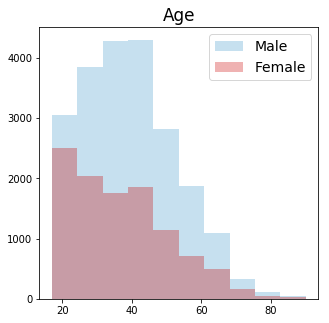

In [12]:
fig, ax1 = plt.subplots(figsize=(5,5))
matplotlib.rcParams.update({'font.size': 14})
ax1.hist(df[(df.sex=='Male')].age,   color='#4499CC', alpha=0.3)
ax1.hist(df[(df.sex=='Female')].age, color='#CC0000', alpha=0.3)
ax1.set_title('Age')
plt.legend(labels = ['Male', 'Female'], loc='upper right')
#plt.legend(labels = ['Male', 'Female'], bbox_to_anchor = (1, 1))

#plt.show()
pass

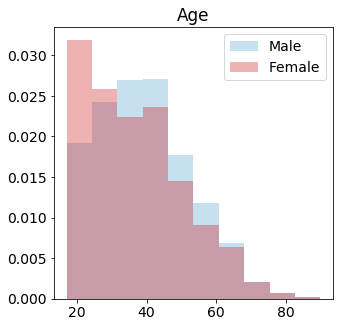

In [13]:
fig, ax1 = plt.subplots(figsize=(5,5))
matplotlib.rcParams.update({'font.size': 14})
ax1.hist(df[(df.sex=='Male')].age, normed=True,   color='#4499CC', alpha=0.3)
ax1.hist(df[(df.sex=='Female')].age, normed=True,color='#CC0000', alpha=0.3)
ax1.set_title('Age')
plt.legend(labels = ['Male', 'Female'], loc='upper right')
#plt.legend(labels = ['Male', 'Female'], bbox_to_anchor = (1, 1))

plt.show()
#pass

### 3.3 Examina dados categóricos

In [14]:
counts_by_marital = df.groupby('marital').size()
print(counts_by_marital)

marital
Divorced                  4443
Married-AF-spouse           23
Married-civ-spouse       14976
Married-spouse-absent      418
Never-married            10683
Separated                 1025
Widowed                    993
dtype: int64


In [15]:
counts_by_type_employer = df.groupby('type_employer').size()
print (counts_by_type_employer)

type_employer
?                    1836
Federal-gov           960
Local-gov            2093
Never-worked            7
Private             22696
Self-emp-inc         1116
Self-emp-not-inc     2541
State-gov            1298
Without-pay            14
dtype: int64


In [16]:
counts_by_country = df.groupby('country').size()
counts_by_education = df.groupby('education').size()
counts_by_occupation = df.groupby('occupation').size()
counts_by_relationship = df.groupby('relationship').size()
counts_by_sex = df.groupby('sex').size()
counts_by_race = df.groupby('race').size()
counts_by_income = df.groupby('income').size()

### 3.2 Visualiza dados categóricos

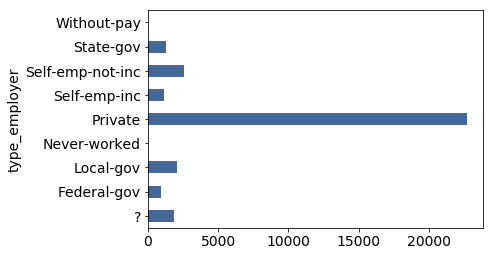

In [17]:
# plota com pandas
counts_by_type_employer.plot(kind='barh', color='#446699')

plt.show()

In [18]:
def my_barh_plot(data, title, fontsize, figsize=(10,5)):

    matplotlib.rcParams.update({'font.size': fontsize})

    fig, ax = plt.subplots(figsize=figsize)
    y_pos = [i for i in range(0,len(data))]
    x_values = list(data)
    ax.barh(y_pos, x_values, height=0.7)
    ax.set_title(title)
    ax.set_yticks(y_pos)
    ax.set_yticklabels(list(data.index))
    plt.xlim((0,max(x_values)*1.2))
    rects = ax.patches

    # For each bar: Place a label
    for rect in rects:
        # Get X and Y placement of label from rect.
        x_value = rect.get_width()
        y_value = rect.get_y() + rect.get_height() / 2

        # Use Y value as label and format number with one decimal place
        label = "{:}".format(x_value)

        # Create annotation
        plt.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(5, 5),              #  Shift label (horizontally,vertically)
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='left',                  # Horizontal label alignment
            va='top')                   # Vertical label alignment

    plt.show()

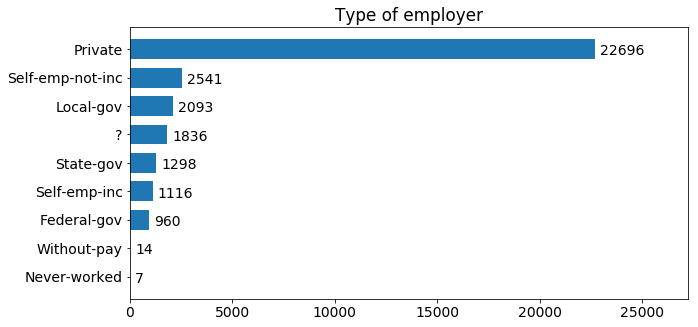

In [19]:
my_barh_plot(counts_by_type_employer.sort_values(), 'Type of employer', 14, (10,5))

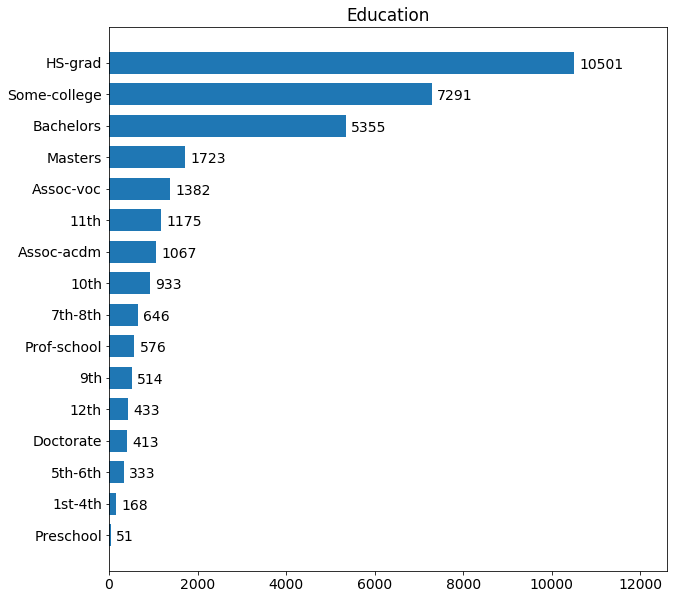

In [20]:
my_barh_plot(counts_by_education.sort_values(), 'Education', 14, (10,10))

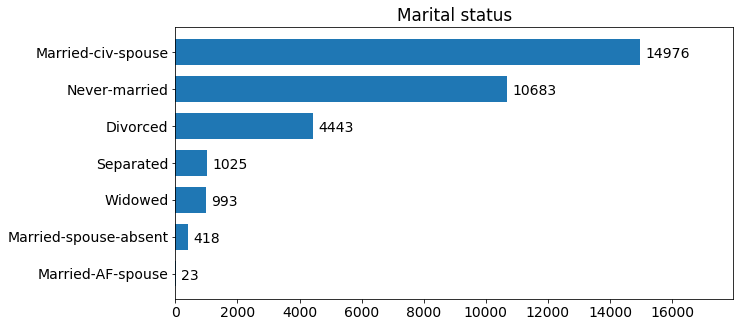

In [21]:
my_barh_plot(counts_by_marital.sort_values(), 'Marital status', 14, (10,5))

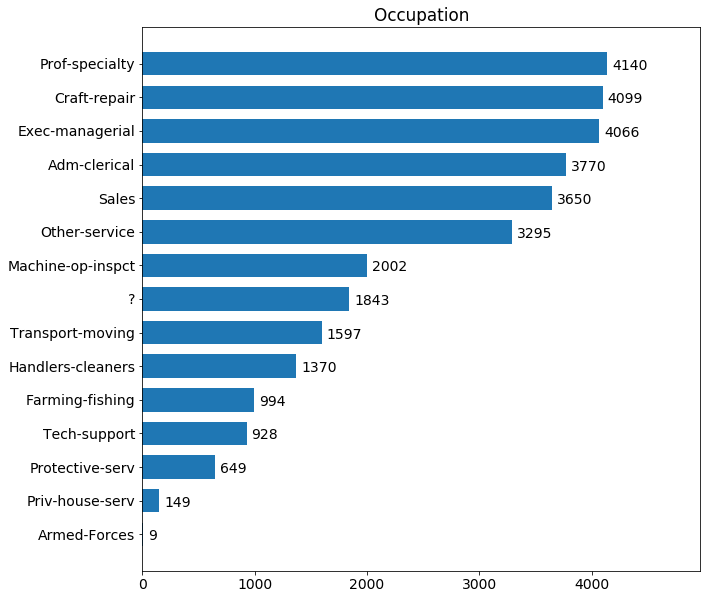

In [22]:
my_barh_plot(counts_by_occupation.sort_values(), 'Occupation', 14, (10,10))

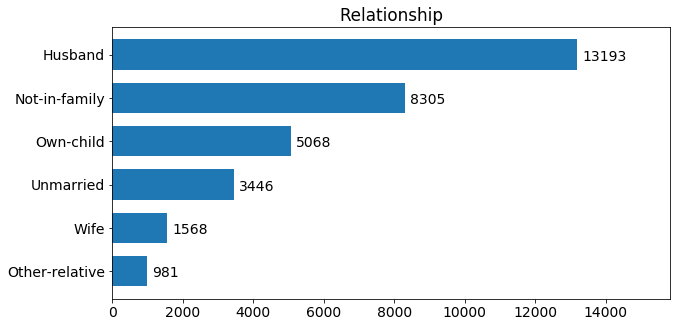

In [23]:
my_barh_plot(counts_by_relationship.sort_values(), 'Relationship', 14, (10,5))

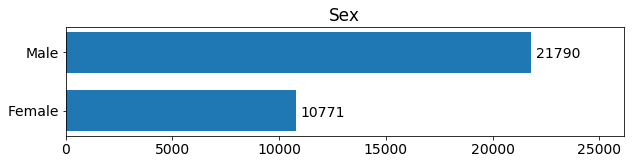

In [24]:
my_barh_plot(counts_by_sex.sort_values(), 'Sex', 14, (10,2))

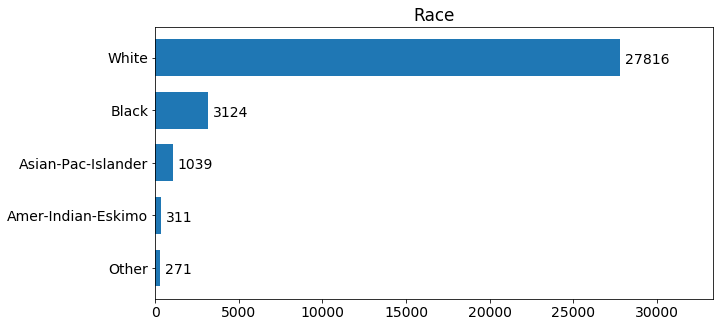

In [25]:
my_barh_plot(counts_by_race.sort_values(), 'Race', 14, (10,5))

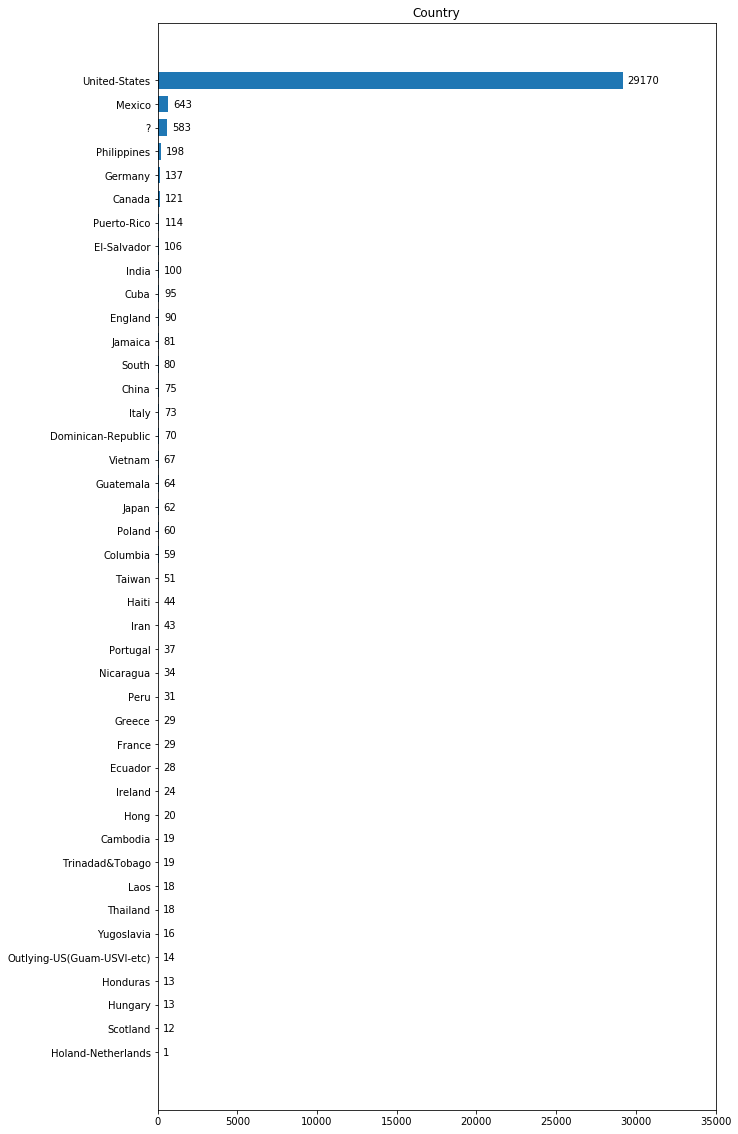

In [26]:
my_barh_plot(counts_by_country.sort_values(), 'Country', 10, (10,20))

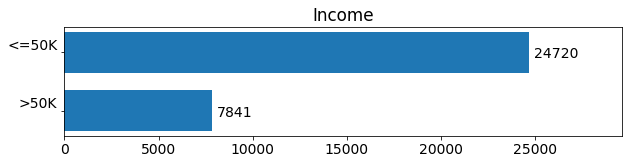

In [27]:
my_barh_plot(counts_by_income.sort_values(), 'Income', 14, (10,2))

sex     income 
Female  <=50K\n     9592
        >50K\n      1179
Male    <=50K\n    15128
        >50K\n      6662
dtype: int64

income,<=50K,>50K
sex,,
Female,9592,1179
Male,15128,6662


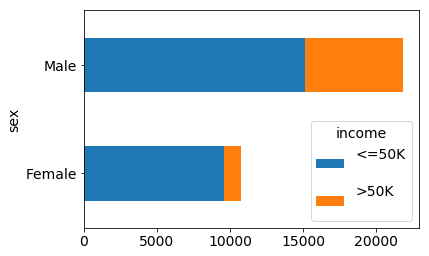

In [28]:
df_sex_income = df.groupby(['sex', 'income']).size()
display(df_sex_income)
df_sex_income = df_sex_income.unstack('income').fillna(0)
display(df_sex_income)
df_sex_income.plot(kind='barh', stacked=True)

plt.show()

sex     income 
Female  <=50K\n     9592
        >50K\n      1179
Male    <=50K\n    15128
        >50K\n      6662
dtype: int64

income,<=50K,>50K
sex,,
Female,9592,1179
Male,15128,6662


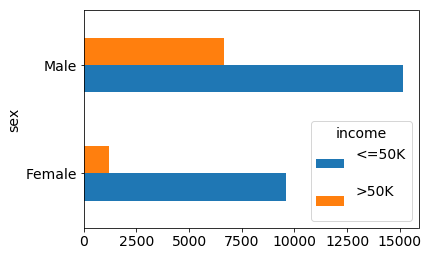

In [29]:
df_sex_income = df.groupby(['sex', 'income']).size()
display(df_sex_income)
df_sex_income = df_sex_income.unstack('income').fillna(0)
display(df_sex_income)
df_sex_income.plot(kind='barh', stacked=False)

plt.show()

## 4. Examinando dados por categoria

In [30]:
import numpy as np
grand_total = np.sum(df_sex_income.sum())
print(grand_total)

32561


In [31]:
df_percent_sex_income = 100.* df_sex_income / grand_total
df_percent_sex_income

income,<=50K,>50K
sex,,
Female,29.458555,3.620896
Male,46.460490,20.460060


In [32]:
df_high_income = df_percent_sex_income['>50K\n']
display(df_high_income)

sex
Female     3.620896
Male      20.460060
Name: >50K\n, dtype: float64

In [33]:
print('The rate of men with high income is:    ', '{:5.2f}'.format(df_high_income['Male']), '%.')
print('The rate of women with high income is:  ', '{:5.2f}'.format(df_high_income['Female']), '%.')
print('The rate of people with high income is: ', '{:5.2f}'.format(df_high_income.sum()), '%.')

The rate of men with high income is:     20.46 %.
The rate of women with high income is:    3.62 %.
The rate of people with high income is:  24.08 %.


In [34]:
df_high_income_male = df[(df.sex == 'Male') & (df.income == '>50K\n')]
print(df_high_income_male.shape)
df_high_income_male.head()

(6662, 15)


,age,type_employer,fnlwgt,education,education_num,marital,occupation,relationship,race,sex,capital_gain,capital_loss,hr_per_week,country,income
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K\n
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K\n
10,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K\n
11,30,State-gov,141297,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,India,>50K\n
14,40,Private,121772,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,0,0,40,?,>50K\n


In [35]:
df_high_income_female = df[(df.sex == 'Female') & (df.income == '>50K\n')]
print(df_high_income_female.shape)
df_high_income_female.head()

(1179, 15)


,age,type_employer,fnlwgt,education,education_num,marital,occupation,relationship,race,sex,capital_gain,capital_loss,hr_per_week,country,income
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K\n
19,43,Self-emp-not-inc,292175,Masters,14,Divorced,Exec-managerial,Unmarried,White,Female,0,0,45,United-States,>50K\n
52,47,Private,51835,Prof-school,15,Married-civ-spouse,Prof-specialty,Wife,White,Female,0,1902,60,Honduras,>50K\n
67,53,Private,169846,HS-grad,9,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,40,United-States,>50K\n
84,44,Private,343591,HS-grad,9,Divorced,Craft-repair,Not-in-family,White,Female,14344,0,40,United-States,>50K\n


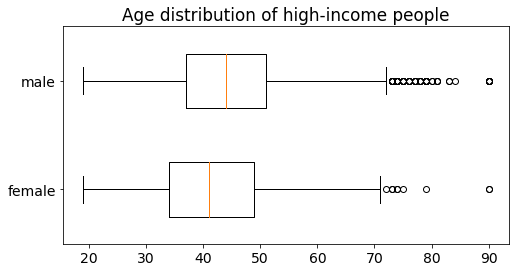

In [36]:
fig, ax = plt.subplots(figsize=(8,4))

ax.boxplot([df_high_income_female.age.values, df_high_income_male.age.values], widths=0.5, labels=['female', 'male'], vert=False)
ax.set_title('Age distribution of high-income people')

plt.show()
#pass

In [37]:
df_income_hr = df[['income', 'hr_per_week']]
display(df_income_hr.head())

,income,hr_per_week
0,<=50K\n,40
1,<=50K\n,13
2,<=50K\n,40
3,<=50K\n,40
4,<=50K\n,40


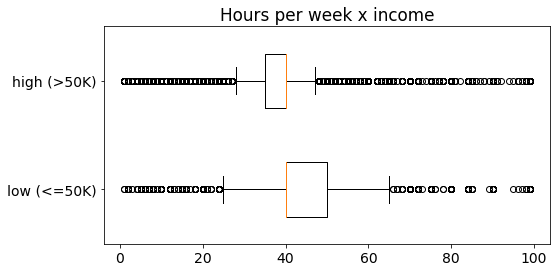

In [38]:
fig, ax = plt.subplots(figsize=(8,4))

df_high = df_income_hr[df_income_hr.income == '<=50K\n']
df_low = df_income_hr[df_income_hr.income == '>50K\n']
ax.boxplot([df_low.hr_per_week.values, df_high.hr_per_week.values], widths=0.5, labels=['low (<=50K)', 'high (>50K)'], vert=False)
ax.set_title('Hours per week x income')

plt.show()
#pass

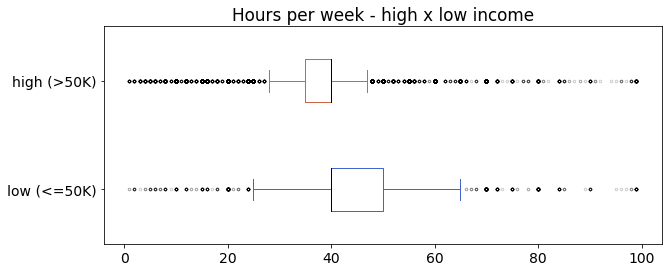

In [39]:
# boxplot com cores e símbolos customizados
import matplotlib.pyplot as plt
import numpy as np

def set_box_color(bp, color):
    plt.setp(bp['boxes'],    color=color)
    plt.setp(bp['whiskers'], color=color)
    plt.setp(bp['caps'],     color=color)
    plt.setp(bp['medians'],  color='k')
    plt.setp(bp['fliers'],   markersize=2.5, markeredgecolor='#000000', alpha=0.2)

fig, ax = plt.subplots(figsize=(10,4))

ticks = ['low (<=50K)', 'high (>50K)']
y_ticks = [0.25, 0.75]
df_high = df_income_hr[df_income_hr.income == '<=50K\n']
df_low = df_income_hr[df_income_hr.income == '>50K\n']
bp1 = ax.boxplot(df_low.hr_per_week.values, positions = [0.25], widths=0.2, labels=['low (<=50K)'], vert=False)
bp2 = ax.boxplot(df_high.hr_per_week.values, positions = [0.75], widths=0.2, labels=['high (>50K)'], vert=False)
set_box_color(bp1, '#4466CC')
set_box_color(bp2, '#CC6644')
plt.ylim((0, 1))
plt.yticks(y_ticks, ticks)
ax.set_title('Hours per week - high x low income')

plt.show()
#pass

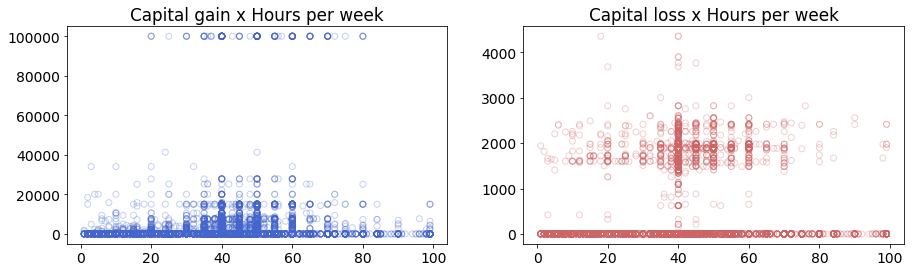

In [40]:
fig, ((ax1, ax2)) = plt.subplots(1,2, figsize=(15,4))

ax1.scatter(df.hr_per_week, df.capital_gain, alpha=0.3, facecolors='none', color='#4466cc')
ax1.set_title('Capital gain x Hours per week')

ax2.scatter(df.hr_per_week, df.capital_loss, alpha=0.3, facecolors='none', color='#cc6666')
ax2.set_title('Capital loss x Hours per week')

plt.show()
#pass

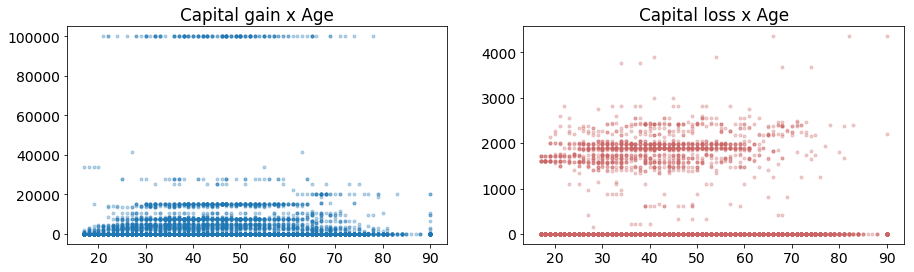

In [41]:
fig, ((ax1, ax2)) = plt.subplots(1,2, figsize=(15,4))

ax1.scatter(df.age, df.capital_gain, alpha=0.3, marker='.')
ax1.set_title('Capital gain x Age')

ax2.scatter(df.age, df.capital_loss, alpha=0.3, marker='.', color='#cc6666')
ax2.set_title('Capital loss x Age')

plt.show()
#pass

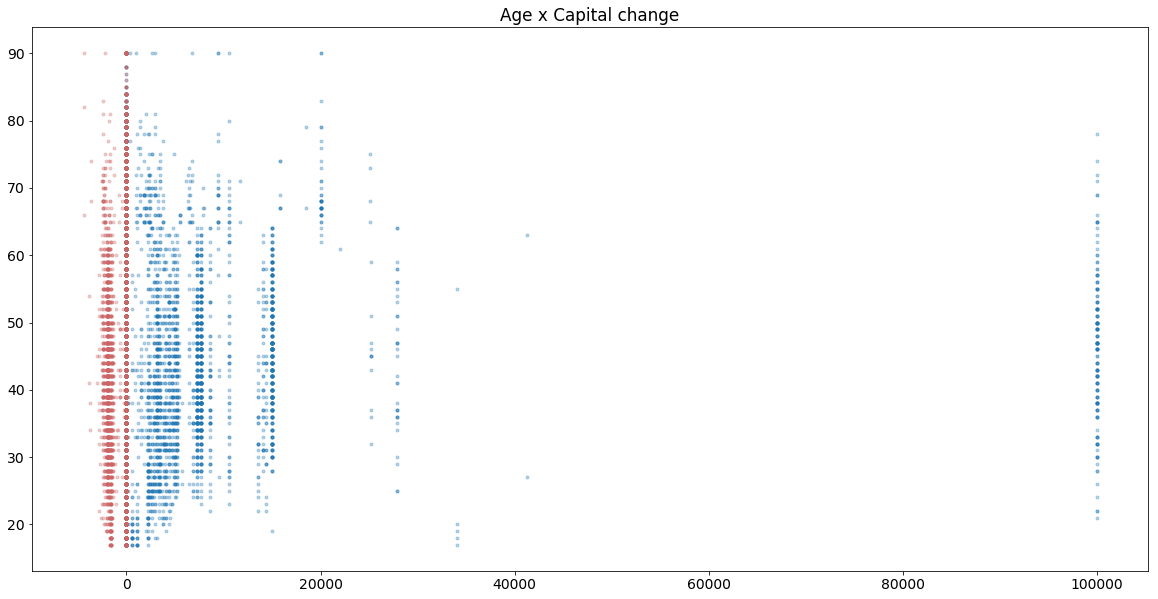

In [42]:
fig, ax1 = plt.subplots(figsize=(20,10))

ax1.scatter(df.capital_gain, df.age, alpha=0.3, marker='.')
ax1.scatter(-df.capital_loss, df.age, alpha=0.3, marker='.', color='#cc6666')
ax1.set_title('Age x Capital change')

plt.show()
#pass

### Scatterplot sem outliers

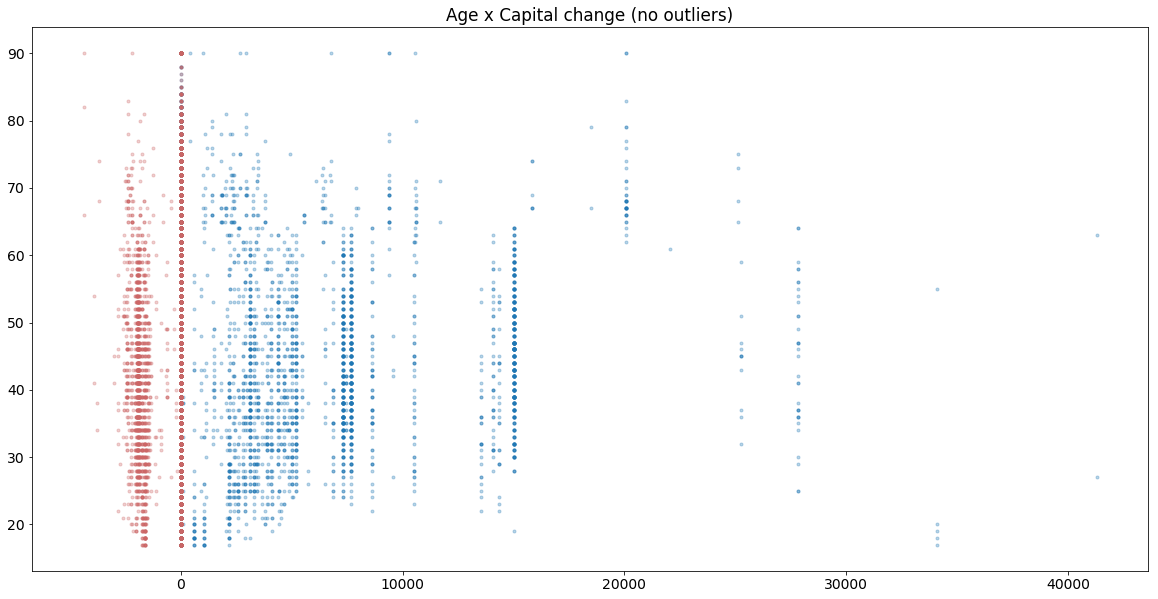

In [43]:
fig, ax1 = plt.subplots(figsize=(20,10))
outlier_threshold = 90000
ax1.scatter(df.capital_gain[(df.capital_gain <= outlier_threshold)], df.age[(df.capital_gain <= outlier_threshold)], alpha=0.3, marker='.')
ax1.scatter(-df.capital_loss, df.age, alpha=0.3, marker='.', color='#cc6666')
ax1.set_title('Age x Capital change (no outliers)')

plt.show()
#pass

In [44]:
temp = df[(df.capital_gain >=90000)]
print(temp.shape)
display(temp)

(159, 15)


,age,type_employer,fnlwgt,education,education_num,marital,occupation,relationship,race,sex,capital_gain,capital_loss,hr_per_week,country,income
1246,54,Self-emp-inc,166459,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,99999,0,60,United-States,>50K\n
1368,52,Private,152234,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,Asian-Pac-Islander,Male,99999,0,40,Japan,>50K\n
1482,53,Self-emp-inc,263925,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,99999,0,40,United-States,>50K\n
1528,52,Private,118025,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,99999,0,50,United-States,>50K\n
1616,46,Private,370119,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,99999,0,60,United-States,>50K\n
1682,43,Private,176270,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,99999,0,60,United-States,>50K\n
1765,49,Private,159816,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,White,Female,99999,0,20,United-States,>50K\n
1771,50,Private,171338,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,White,Male,99999,0,50,United-States,>50K\n
1826,22,Self-emp-not-inc,202920,HS-grad,9,Never-married,Prof-specialty,Unmarried,White,Female,99999,0,40,Dominican-Republic,>50K\n
2103,43,Self-emp-inc,172826,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,99999,0,55,United-States,>50K\n


### Correlação de Pearson $\rho$ (Correlação linear)
Utilizada quando as distribuições são próximas da normal.

Produtos dos scores z padrão:

$$ p_i = \frac{(x_i - \mu_X)}{\sigma_X} \frac{(y_i - \mu_Y)}{\sigma_Y} $$
 
Média desses produtos:

$$ \rho = \frac{1}{n} \sum p_i = \frac{1}{n} \sum  \frac{(x_i - \mu_X)}{\sigma_X} \frac{(y_i - \mu_Y)}{\sigma_Y}  $$

Fatorando $\sigma_X$ e $\sigma_Y$:

$$ \rho = \frac{Cov(X,Y)}{\sigma_X \sigma_Y}$$

 


Pergunta: Há correlação entre capital gain e hours per week?

In [45]:
display(Markdown('### Pearson correlation coefficient (numpy)\n'))
print(np.corrcoef(df.capital_gain.values, df.hr_per_week.values))

from scipy.stats.stats import pearsonr   
r, p_value = pearsonr(df.capital_gain.values, df.hr_per_week.values)
display(Markdown('### Pearson correlation coefficient (scipy)\n'))
display(Markdown('{:.5f}'.format(r)))

if abs(r) > 0.8:
    display(Markdown('forte correlação'))
else:
    if abs(r) > 0.5:
        display(Markdown('correlação média'))
    else:
        display(Markdown('correlação fraca ou não há correlação'))

### Pearson correlation coefficient (numpy)


[[1.         0.07840862]
 [0.07840862 1.        ]]


### Pearson correlation coefficient (scipy)


0.07841

correlação fraca ou não há correlação

### Correlação de Spearman (rank)

Usada quando as distribuições são assimétricas. Computa-se o rank de cada valor, e depois computa-se a correlação de Pearson sobre os ranks.

In [46]:
from scipy.stats.stats import spearmanr   

r, p_value = pearsonr(df.capital_gain.values, df.hr_per_week.values)
display(Markdown('#### Pearson correlation coefficient (scipy)'))
display(Markdown('{:.5f}'.format(r)))

if abs(r) > 0.8:
    display(Markdown('forte correlação'))
else:
    if abs(r) > 0.5:
        display(Markdown('correlação média'))
    else:
        display(Markdown('correlação fraca ou não há correlação'))

from scipy.stats.stats import spearmanr   

display(Markdown('#### Spearman rank correlation coefficient (scipy)'))
spearman_rho = spearmanr(df.capital_gain.values, df.hr_per_week.values)[0]
display(Markdown('{:.5f}'.format(spearman_rho)))

#### Pearson correlation coefficient (scipy)

0.07841

correlação fraca ou não há correlação

#### Spearman rank correlation coefficient (scipy)

0.09332

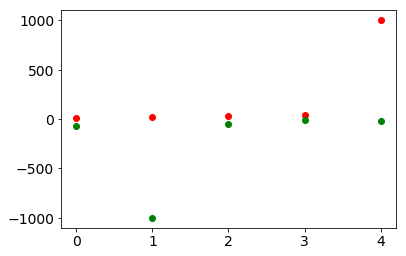

Pearson rank coefficient: 0.28
Spearman rank coefficient: 0.80


In [47]:
# forma "manual" de calcular o Spearman rank correlation coefficient

def list2rank(l):
    #l is a list of numbers
    # returns a list of 1-based index; mean when multiple instances
    return [np.mean([i+1 for i, sorted_el in enumerate(sorted(l)) if sorted_el == el]) for el in l]

def spearmanRank(X, Y):
    # X and Y are same-length lists
    print (list2rank(X) )
    print (list2rank(Y))
    return pearsonr(list2rank(X), list2rank(Y))[0]

X = [10, 20, 30, 40, 1000]
Y = [-70, -1000, -50, -10, -20]
plt.plot(X,'ro')
plt.plot(Y,'go')

plt.show()

print ("Pearson rank coefficient: %.2f" % pearsonr(X,Y)[0])
print ("Spearman rank coefficient: %.2f" % spearmanr(X,Y)[0])

## **<span style="color:red">Obs.: Retirar o código acima que não formos utilizar, antes da entrega do exercício!!!</span>**
</b>
</b>
</b>
# Nossas hipóteses:

## *1ª Hipótese: Será que há correlação entre etnia e horas de trabalho?*

In [48]:
# Verificando quais são as etnias listadas
df.race.unique()

array(['White', 'Black', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo',
       'Other'], dtype=object)

In [49]:
# Mudando por uma numeração, para poder fazer os cálculos de correlação
dfRaces = df.replace(['White', 'Black', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo', 'Other'], 
                     [1, 2, 3, 4, 5])
dfRaces.race.unique()

array([1, 2, 3, 4, 5], dtype=int64)

In [50]:
# Calculando as correlações, usando Pearson e Spearman
from scipy.stats.stats import spearmanr   

r, p_value = pearsonr(dfRaces.race.values, dfRaces.hr_per_week.values)
display(Markdown('#### Coeficiente de Correlação de Pearson, usando scipy'))
display(Markdown('{:.5f}'.format(r)))

if abs(r) > 0.8:
    display(Markdown('Forte correlação'))
else:
    if abs(r) > 0.5:
        display(Markdown('Correlação média'))
    else:
        display(Markdown('Correlação fraca ou não há correlação'))

from scipy.stats.stats import spearmanr

display(Markdown('#### Coeficiente de Correlação de ranking de Spearman, usando scipy'))
spearman_rho = spearmanr(dfRaces.race.values, dfRaces.hr_per_week.values)[0]
display(Markdown('{:.5f}'.format(spearman_rho)))

#### Coeficiente de Correlação de Pearson, usando scipy

-0.03311

Correlação fraca ou não há correlação

#### Coeficiente de Correlação de ranking de Spearman, usando scipy

-0.07552

Vemos que de fato a correlação para ambos os casos é extremamente baixa

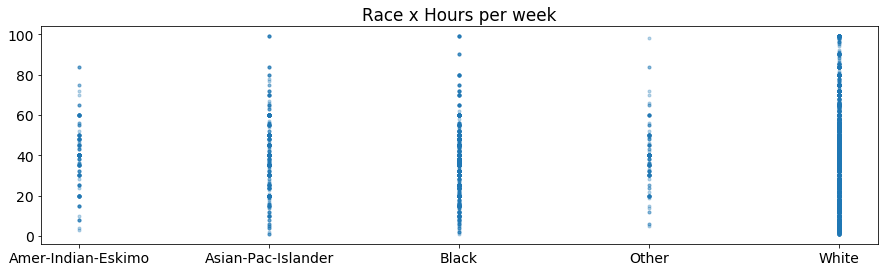

In [51]:
# Montando um Scatterplot para vasualizar os valores
fig, ax1 = plt.subplots(1, figsize=(15,4))

# Substituindo os valores numéricos pela string de etnia que representam para mostrar no gráfico
Xuniques, Xaxis = np.unique(df['race'], return_inverse=True)
ax1.scatter(Xaxis, dfRaces.hr_per_week, alpha=0.3, marker='.')
ax1.set(xticks=range(len(Xuniques)), xticklabels=Xuniques)

ax1.set_title('Race x Hours per week')

plt.show()

O gráfico nos mostra que existe uma distribuição relativamente equilibrada entre o tempo semanal de trabalho entre cada uma das cinco etnias registradas nos dados, tendo maiores concentrações entre 20 e 60 horas para todas com algumas exceções de distanciando bem dessa média. O gráfico também nos mostra a enorme diferença da quantidade de registros para Brancos em relação às demais.

## **<span style="color:red">Melhoras/ideias para esta hipótese:</span>**
- Mostrar informações como média, valor máximo e mínimo de horas trabalhadas para cada etnia

## *2ª Hipótese: Será que empregados de empresas particulares têm maior perda de capital do que servidores públicos em média?*

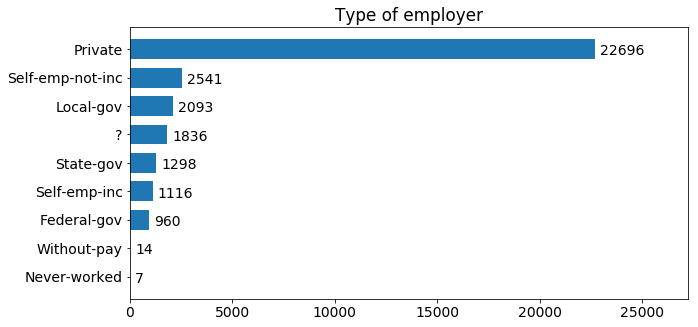

In [52]:
# tirar celula
my_barh_plot(counts_by_type_employer.sort_values(), 'Type of employer', 14, (10,5))

In [53]:
# tirar celula
df.dtypes

age               int64
type_employer    object
fnlwgt            int64
education        object
education_num     int64
marital          object
occupation       object
relationship     object
race             object
sex              object
capital_gain      int64
capital_loss      int64
hr_per_week       int64
country          object
income           object
dtype: object

In [54]:
# Analisando o que temos no campo de tipo de empregado, nos interessam inicialmente os campos ['State-gov', 'Private', 'Federal-gov','Local-gov']
df.type_employer.unique()

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', '?', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [55]:
# Agrupando apenas os dados que nos interessam
dfEmployerType = df.loc[(df['type_employer'] == 'State-gov') | (df['type_employer'] == 'Private') | (df['type_employer'] == 'Federal-gov') | (df['type_employer'] == 'Local-gov')]
dfEmployerType = dfEmployerType[['type_employer','capital_loss']]
dfEmployerType = dfEmployerType.reset_index(drop = True)
dfEmployerType.type_employer.unique()

array(['State-gov', 'Private', 'Federal-gov', 'Local-gov'], dtype=object)

,capital_loss
type_employer,
Federal-gov,112.268750
Local-gov,109.854276
Private,80.008724
State-gov,83.256549


              type_employer
capital_loss  Federal-gov      112.268750
              Local-gov        109.854276
              Private           80.008724
              State-gov         83.256549
dtype: float64

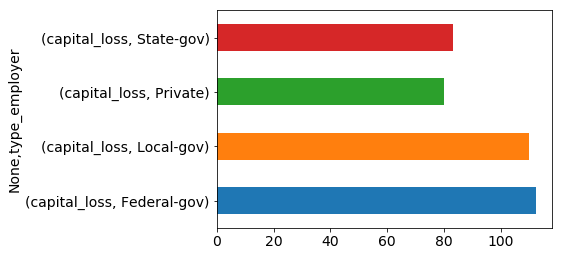

In [56]:
# Calculando a média, montando o data frame pelos valores únicos do tipo de empregado
dfEmployerTypeMeans = dfEmployerType.groupby('type_employer').mean()
display(dfEmployerTypeMeans)
dfEmployerTypeMeans = dfEmployerTypeMeans.unstack('capital_loss').fillna(0)
display(dfEmployerTypeMeans)
dfEmployerTypeMeans.plot(kind='barh', stacked=True)

plt.show()

## **<span style="color:red">Melhoras/ideias para esta hipótese:</span>**
- Dar conclusão do que foi achado
- Passo final: juntar empregos governamentais em um único grupo, calcular média e comparar com o Privado

## *3ª Hipótese: Qual é a area de atuação que menos valoriza instrução em termos de salário?*

## *4ª Hipótese: Será que pessoas casadas acumulam mais ao longo da vida do que solteiras?*